<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8; font-size: 16px;">

# 🚀 CUDA vs Tensor Cores

## 📋 فهرس المحتويات

✅ **مقدمة سريعة**: إيه الفرق بين CUDA و Tensor Cores؟

✅ **تجربة عملية**: مقارنة الأداء بالأرقام والكود

✅ **الفهم العميق**: إزاي كل تقنية بتشتغل من الداخل؟

✅ **نصائح عملية**: إمتى تستخدم إيه؟

---

### 🎯 الهدف من الموضوع ده

هنفهم **بالتجربة العملية** إيه الفرق الحقيقي بين استخدام:
- **CPU** للحسابات العادية
- **CUDA Cores** لتسريع العمليات 
- **Tensor Cores** للتسريع الفائق لضرب المصفوفات

</div>

---

<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 🔍 المفاهيم الأساسية

### 💻 إيه هو CUDA؟

**CUDA** (Compute Unified Device Architecture) هي منصة الحوسبة المتوازية من NVIDIA اللي بتخليك تستغل قوة كارت الشاشة في العمليات الحسابية العامة، مش بس الرسومات.

**المميزات الرئيسية:**
- 🔧 **سهولة البرمجة**: تقدر تكتب كود C/C++/Python عادي
- ⚡ **توازي هائل**: آلاف الـ cores بتشتغل مع بعض
- 🎮 **مرونة**: مناسب لأي نوع عمليات حسابية

### 🧠 إيه هي Tensor Cores؟

**Tensor Cores** هي وحدات معالجة متخصصة جداً في ضرب المصفوفات، موجودة جوا الـ GPU الحديثة من NVIDIA.

**المميزات الخاصة:**
- 🚀 **سرعة فائقة**: أسرع 10-20 مرة من CUDA Cores في ضرب المصفوفات
- 🎯 **تخصص عالي**: مصممة خصيصاً للـ AI و Deep Learning
- 💾 **استهلاك طاقة أقل**: كفاءة أعلى في استخدام الكهرباء

</div>

<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 🧪 التجربة العملية: مقارنة الأداء

هنعمل تجربة واقعية نقارن فيها أداء CPU vs CUDA vs Tensor Cores في عملية ضرب مصفوفات.

### 📊 إعدادات التجربة
- **حجم المصفوفة**: 256 × 1024 (مدخلات) × 2048 (مخرجات)
- **عدد التكرارات**: 10,000 مرة
- **الهدف**: قياس الوقت المستغرق لكل تقنية

</div>

In [1]:
# 📦 استيراد المكتبات المطلوبة
import torch
import torch.nn as nn
import time
import numpy as np
import matplotlib.pyplot as plt

# ✅ التأكد من توفر CUDA
print(f"🔍 CUDA متاح: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"📱 اسم الكارت: {torch.cuda.get_device_name()}")
    print(f"💾 VRAM المتاح: {torch.cuda.get_device_properties(0).total_memory / 1e9:.1f} GB")

# ⚙️ إعدادات التجربة
MATRIX_ROWS = 256      # عدد الصفوف
INPUT_FEATURES = 1024  # عدد المدخلات
OUTPUT_FEATURES = 2048 # عدد المخرجات
ITERATIONS = 10000     # عدد التكرارات

print(f"\n📏 أبعاد المصفوفة: {MATRIX_ROWS} × {INPUT_FEATURES} → {OUTPUT_FEATURES}")
print(f"🔁 عدد التكرارات: {ITERATIONS:,}")

🔍 CUDA متاح: True
📱 اسم الكارت: NVIDIA GeForce RTX 3050 Laptop GPU
💾 VRAM المتاح: 4.3 GB

📏 أبعاد المصفوفة: 256 × 1024 → 2048
🔁 عدد التكرارات: 10,000


<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 🐌 التجربة الأولى: CPU فقط

هنبدأ بالـ CPU العادي علشان نشوف الأداء الأساسي ونفهم ليه بطيء.

### 🤔 ليه الـ CPU بطيء في ضرب المصفوفات؟

**السبب الرئيسي**: الـ CPU بيشتغل بطريقة **تتابعية** (Sequential)

<center>
<img src="https://www.scaler.com/topics/images/Multiplication-of-two-matrix-in-java.gif" width="500" height="300" alt="Matrix Multiplication Animation"/>
</center>

**المشكلة:**
- كل عنصر بيتحسب **لوحده**
- في كل Clock Cycle → عملية ضرب **واحدة** بس
- لضرب مصفوفتين كبيرتين → ملايين العمليات **بالتتابع**

</div>

In [2]:
# 🐌 تجربة CPU: الطريقة التقليدية
print("🐌 بدء تجربة CPU...")

# إنشاء البيانات على CPU
start_time = time.time()
cpu_tensor = torch.randn(MATRIX_ROWS, INPUT_FEATURES, dtype=torch.float32)
cpu_layer = nn.Linear(INPUT_FEATURES, OUTPUT_FEATURES, dtype=torch.float32)

# تنفيذ العمليات
cpu_start = time.time()
for i in range(ITERATIONS):
    if i % 1000 == 0:  # طباعة التقدم
        print(f"  📊 التقدم: {i}/{ITERATIONS}")
    _ = cpu_layer(cpu_tensor)

cpu_time = time.time() - cpu_start
print(f"\n⏱️ CPU إجمالي الوقت: {cpu_time:.2f} ثانية")
print(f"📈 متوسط الوقت لكل عملية: {cpu_time/ITERATIONS*1000:.3f} ميلي ثانية")

🐌 بدء تجربة CPU...
  📊 التقدم: 0/10000
  📊 التقدم: 1000/10000
  📊 التقدم: 2000/10000
  📊 التقدم: 3000/10000
  📊 التقدم: 4000/10000
  📊 التقدم: 5000/10000
  📊 التقدم: 6000/10000
  📊 التقدم: 7000/10000
  📊 التقدم: 8000/10000
  📊 التقدم: 9000/10000

⏱️ CPU إجمالي الوقت: 48.27 ثانية
📈 متوسط الوقت لكل عملية: 4.827 ميلي ثانية


<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 🧵 فهم محدودية CPU: الـ Threads والـ Cores

### 💡 طب إزاي نحسن أداء CPU؟

**الحل النظري**: نوزع الشغل على **Threads متعددة**

</div>

In [3]:
# 🔍 معلومات عن معالج النظام
import os
import multiprocessing

logical_cores = os.cpu_count()
physical_cores = multiprocessing.cpu_count()

print(f"🖥️ معلومات المعالج:")
print(f"   💠 Logical Cores (Threads): {logical_cores}")
print(f"   🔘 Physical Cores: {physical_cores}")
print(f"   📊 نسبة Hyperthreading: {logical_cores/physical_cores:.1f}x")

# المعادلة النظرية للتسريع
theoretical_speedup = logical_cores
print(f"\n🧮 التسريع النظري المتوقع: {theoretical_speedup}x")
print(f"⚡ الوقت المثالي مع الـ Threads: {cpu_time/theoretical_speedup:.2f} ثانية")

🖥️ معلومات المعالج:
   💠 Logical Cores (Threads): 12
   🔘 Physical Cores: 12
   📊 نسبة Hyperthreading: 1.0x

🧮 التسريع النظري المتوقع: 12x
⚡ الوقت المثالي مع الـ Threads: 4.02 ثانية


<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

### 📊 جدول مقارنة معالجات السوق

| المعالج | Physical Cores | Logical Threads | التسريع النظري |
|---------|---------------|-----------------|----------------|
| **AMD Ryzen 5 6600H** | 6 | 12 | 12x |
| **Intel i7-12700H** | 14 | 28 | 28x |
| **Intel i5-12400F** | 6 | 12 | 12x |
| **AMD Ryzen 9 7950X** | 16 | 32 | 32x |

### 🤔 ليه حتى مع Threads كتيرة، CPU لسه بطيء؟

**المشاكل الحقيقية:**

1. **🔄 Context Switching**: وقت ضائع في التنقل بين Threads
2. **🚧 Memory Bandwidth**: الذاكرة محدودة السرعة
3. **⚖️ Load Balancing**: صعوبة توزيع الشغل بالتساوي
4. **🎯 مش مصمم للـ Massive Parallelism**: مناسب للـ 10-100 threads، مش آلاف

**النتيجة**: حتى أقوى CPU بـ 64 threads مش هيقارب أداء GPU بآلاف الـ cores

</div>

<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## ⚡ التجربة الثانية: CUDA Cores

دلوقتي هنجرب GPU بالـ CUDA Cores العادية ونشوف الفرق.

### 🏗️ بنية GPU: مصمم للتوازي الهائل

<center>
<img src="https://developer-blogs.nvidia.com/wp-content/uploads/2020/06/kernel-execution-on-gpu-1-625x438.png" width="600" height="400" alt="GPU Architecture"/>
</center>

**المكونات الأساسية:**
- **🌐 Grid**: مجموعة من الـ Blocks
- **📦 Block**: مجموعة Threads بتشارك ذاكرة سريعة
- **🧵 Warp**: كل 32 Thread بينفذوا نفس التعليمة مع بعض

**المميزات:**
- 🚀 **آلاف CUDA Cores**: بدلاً من عشرات في CPU
- 🎯 **SIMT**: نفس التعليمة على آلاف البيانات
- 💾 **Shared Memory**: تبادل سريع للبيانات بين Threads

</div>

In [4]:
# ⚡ تجربة CUDA: التسريع الأول
if torch.cuda.is_available():
    print("⚡ بدء تجربة CUDA Cores...")
    
    # إنشاء البيانات على GPU
    cuda_tensor = torch.randn(MATRIX_ROWS, INPUT_FEATURES, dtype=torch.float32).cuda()
    cuda_layer = nn.Linear(INPUT_FEATURES, OUTPUT_FEATURES, dtype=torch.float32).cuda()
    
    # Warm-up: تسخين GPU
    for _ in range(100):
        _ = cuda_layer(cuda_tensor)
    torch.cuda.synchronize()
    
    # القياس الفعلي
    cuda_start = time.time()
    for i in range(ITERATIONS):
        if i % 2000 == 0:
            print(f"  📊 التقدم: {i}/{ITERATIONS}")
        _ = cuda_layer(cuda_tensor)
    
    torch.cuda.synchronize()  # انتظار اكتمال كل العمليات
    cuda_time = time.time() - cuda_start
    
    print(f"\n⏱️ CUDA إجمالي الوقت: {cuda_time:.2f} ثانية")
    print(f"📈 متوسط الوقت لكل عملية: {cuda_time/ITERATIONS*1000:.3f} ميلي ثانية")
    
    # حساب التسريع
    speedup = cpu_time / cuda_time
    print(f"🚀 التسريع مقارنة بـ CPU: {speedup:.1f}x")
    
else:
    print("❌ CUDA غير متاح على هذا النظام")
    cuda_time = float('inf')
    speedup = 0

⚡ بدء تجربة CUDA Cores...
  📊 التقدم: 0/10000
  📊 التقدم: 2000/10000
  📊 التقدم: 4000/10000
  📊 التقدم: 6000/10000
  📊 التقدم: 8000/10000

⏱️ CUDA إجمالي الوقت: 3.33 ثانية
📈 متوسط الوقت لكل عملية: 0.333 ميلي ثانية
🚀 التسريع مقارنة بـ CPU: 14.5x


<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

### 🤔 ليه CUDA مش وصل للسرعة القصوى؟

**المشكلة الأساسية**: إحنا بنشغل GPU **مش بكفاءة**!

**السبب**: 
```python
for i in range(10000):
    layer(tensor)  # batch صغير (256 × 1024)
```

**المشكلة**:
- كل مرة GPU بيشتغل شوية ويستنى
- الـ workload صغير مش بيشغل كل الـ cores
- GPU بيقعد **idle** أوقات كتيرة

**التشبيه**: زي إنك تشغل مصنع كامل علشان تعمل منتج واحد بس! 🏭

### 💡 الحل النظري: Batching

بدل 10,000 عملية صغيرة → عملية واحدة كبيرة:

```python
# بدل كده:
for i in range(10000):
    output = layer(small_batch)

# نعمل كده:
big_batch = combine_all_small_batches()
output = layer(big_batch)  # مرة واحدة بس!
```

</div>

<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

### 💾 مشكلة الذاكرة (VRAM)

**المشكلة**: لو عملنا batch واحد ضخم:

```
Input Size = (10000 × 256) × 1024 × 4 bytes ≈ 10.5 GB
Output Size = (10000 × 256) × 2048 × 4 bytes ≈ 21.0 GB
المجموع ≈ 31.5 GB VRAM 🤯
```

**المقارنة**:
- RTX 4090: 24GB ❌
- RTX 3080: 10GB ❌  
- RTX 3060: 12GB ❌
- GTX 1660: 6GB ❌

**النتيجة**: `OutOfMemoryError: CUDA out of memory`

</div>

In [5]:
# 💾 محاولة batch كبير (هتفشل غالباً)
if torch.cuda.is_available():
    try:
        print("💾 محاولة إنشاء batch ضخم...")
        
        # حساب الحجم المطلوب
        batch_size = ITERATIONS * MATRIX_ROWS
        input_memory = batch_size * INPUT_FEATURES * 4 / (1024**3)  # GB
        output_memory = batch_size * OUTPUT_FEATURES * 4 / (1024**3)  # GB
        total_memory = input_memory + output_memory
        
        print(f"📊 الذاكرة المطلوبة:")
        print(f"   📥 Input: {input_memory:.1f} GB")
        print(f"   📤 Output: {output_memory:.1f} GB") 
        print(f"   📦 المجموع: {total_memory:.1f} GB")
        
        available_memory = torch.cuda.get_device_properties(0).total_memory / (1024**3)
        print(f"💾 VRAM متاح: {available_memory:.1f} GB")
        
        if total_memory > available_memory * 0.8:  # نسبة أمان 80%
            print("⚠️ الذاكرة المطلوبة أكبر من المتاح - هنتجنب المحاولة")
        else:
            # إنشاء batch ضخم
            huge_tensor = cuda_tensor.repeat(ITERATIONS, 1)
            torch.cuda.synchronize()
            
            batch_start = time.time()
            with torch.no_grad():  # توفير ذاكرة
                _ = cuda_layer(huge_tensor)
            torch.cuda.synchronize()
            batch_time = time.time() - batch_start
            
            print(f"⚡ وقت Batch الضخم: {batch_time:.3f} ثانية")
            print(f"🚀 التسريع الحقيقي: {cuda_time/batch_time:.1f}x")
            
    except RuntimeError as e:
        print(f"❌ خطأ في الذاكرة: {str(e)[:100]}...")
        print("💡 الحل: استخدام Mini-batches")

💾 محاولة إنشاء batch ضخم...
📊 الذاكرة المطلوبة:
   📥 Input: 9.8 GB
   📤 Output: 19.5 GB
   📦 المجموع: 29.3 GB
💾 VRAM متاح: 4.0 GB
⚠️ الذاكرة المطلوبة أكبر من المتاح - هنتجنب المحاولة


<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 🧠 التجربة الثالثة: Tensor Cores - القوة الحقيقية

دلوقتي هنجرب الـ **Tensor Cores** - التقنية المتخصصة في ضرب المصفوفات.

### 🎯 إيه الفرق بين CUDA Cores و Tensor Cores؟

| المعيار | **CUDA Cores** | **Tensor Cores** |
|---------|---------------|-----------------|
| 🎯 **التخصص** | عمليات عامة (General Purpose) | ضرب المصفوفات فقط |
| 🧮 **نوع العملية** | Scalar × Scalar | Matrix × Matrix |
| ⚡ **السرعة** | سريع | أسرع 10-20x |
| 💾 **نوع البيانات** | FP32, FP16, INT8, etc. | FP16, BF16, TF32 فقط |
| 🔧 **المرونة** | مرن جداً | محدود لضرب المصفوفات |

### 🧠 الخلفية: معمارية الـ GPU من NVIDIA

| المعمارية  | اسم الجيل    | تاريخ الإصدار | يدعم Tensor Cores؟                | أبرز استخدام                             |
| ---------- | ------------ | ------------- | --------------------------------- | ---------------------------------------- |
| **Pascal** | مثل GTX 1080 | 2016          | ❌ لا                              | ألعاب، رسومات                            |
| **Volta**  | مثل V100     | 2017          | ✅ نعم (أول ظهور للـ Tensor Cores) | AI, HPC                                  |
| **Turing** | مثل RTX 2080 | 2018          | ✅ نعم (جيل محسّن)                 | DL + Ray Tracing                         |
| **Ampere** | مثل RTX 3080 | 2020          | ✅ أقوى Tensor Cores               | AI + DL تدريب/استدلال                    |
| **Hopper** | مثل H100     | 2022          | ✅ متطور جداً                      | LLMs + GPT + AI على مستوى مراكز البيانات |


### 🔬 الفرق التقني العميق

**CUDA Core (طريقة تقليدية)**:
```
1. Load A[i]     → Register
2. Load B[j]     → Register  
3. Multiply      → ALU
4. Add to C[k]   → ALU
5. Store Result  → Memory
```

**Tensor Core (ثورة)**:
```
1. Load Matrix Block (16×16) → MMA Unit
2. Matrix-Multiply-Add       → Single Operation!
3. Store Block Result        → Memory
```

**النتيجة**: كل العمليات بتحصل في **دورة واحدة** بدل 5 دورات!

ودا الفرق في السرعه بين نوع ال GPU ال بيدعم ال Tensor زي VOLTA والنوع ال  مش بيدعم زي PASCAL وازاي كل نوع بيتعامل مع ال بيانات ال داخله هل علي حده ولا علي شكل matrix وكمية العمليات الممكن تقوم بيها ال VOLTA اثناء قيام ال PASCAL بعملية واحده بس


<center><img src=https://images.nvidia.com/aem-dam/Solutions/Data-Center/tensorcore/Volta-Tensor-Core_30fps_FINAL_994x559.gif width=500></center>


</div>

In [6]:
# 🧠 تجربة Tensor Cores: القوة الحقيقية
if torch.cuda.is_available():
    print("🧠 بدء تجربة Tensor Cores...")
    
    # ⚠️ شرط مهم: لازم نستخدم FP16 علشان Tensor Cores تشتغل
    tensor_fp16 = torch.randn(MATRIX_ROWS, INPUT_FEATURES, dtype=torch.float16).cuda()
    layer_fp16 = nn.Linear(INPUT_FEATURES, OUTPUT_FEATURES, dtype=torch.float16).cuda()
    
    print("✅ تم تحويل البيانات لـ FP16 (Half Precision)")
    
    # Warm-up
    for _ in range(100):
        _ = layer_fp16(tensor_fp16)
    torch.cuda.synchronize()
    
    # القياس الفعلي
    tensor_start = time.time()
    for i in range(ITERATIONS):
        if i % 2000 == 0:
            print(f"  📊 التقدم: {i}/{ITERATIONS}")
        _ = layer_fp16(tensor_fp16)
    
    torch.cuda.synchronize()
    tensor_time = time.time() - tensor_start
    
    print(f"\n⏱️ Tensor Cores إجمالي الوقت: {tensor_time:.2f} ثانية")
    print(f"📈 متوسط الوقت لكل عملية: {tensor_time/ITERATIONS*1000:.3f} ميلي ثانية")
    
    # حساب التسريع
    cpu_speedup = cpu_time / tensor_time
    cuda_speedup = cuda_time / tensor_time
    
    print(f"\n🚀 مقارنة التسريع:")
    print(f"   vs CPU: {cpu_speedup:.1f}x")
    print(f"   vs CUDA: {cuda_speedup:.1f}x")
    
else:
    print("❌ CUDA غير متاح")
    tensor_time = float('inf')

🧠 بدء تجربة Tensor Cores...
✅ تم تحويل البيانات لـ FP16 (Half Precision)
  📊 التقدم: 0/10000
  📊 التقدم: 2000/10000
  📊 التقدم: 4000/10000
  📊 التقدم: 6000/10000
  📊 التقدم: 8000/10000

⏱️ Tensor Cores إجمالي الوقت: 0.83 ثانية
📈 متوسط الوقت لكل عملية: 0.083 ميلي ثانية

🚀 مقارنة التسريع:
   vs CPU: 58.1x
   vs CUDA: 4.0x


<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 📊 تلخيص النتائج ومقارنة شاملة

### 🏆 ترتيب الأداء (من الأبطأ للأسرع)

</div>

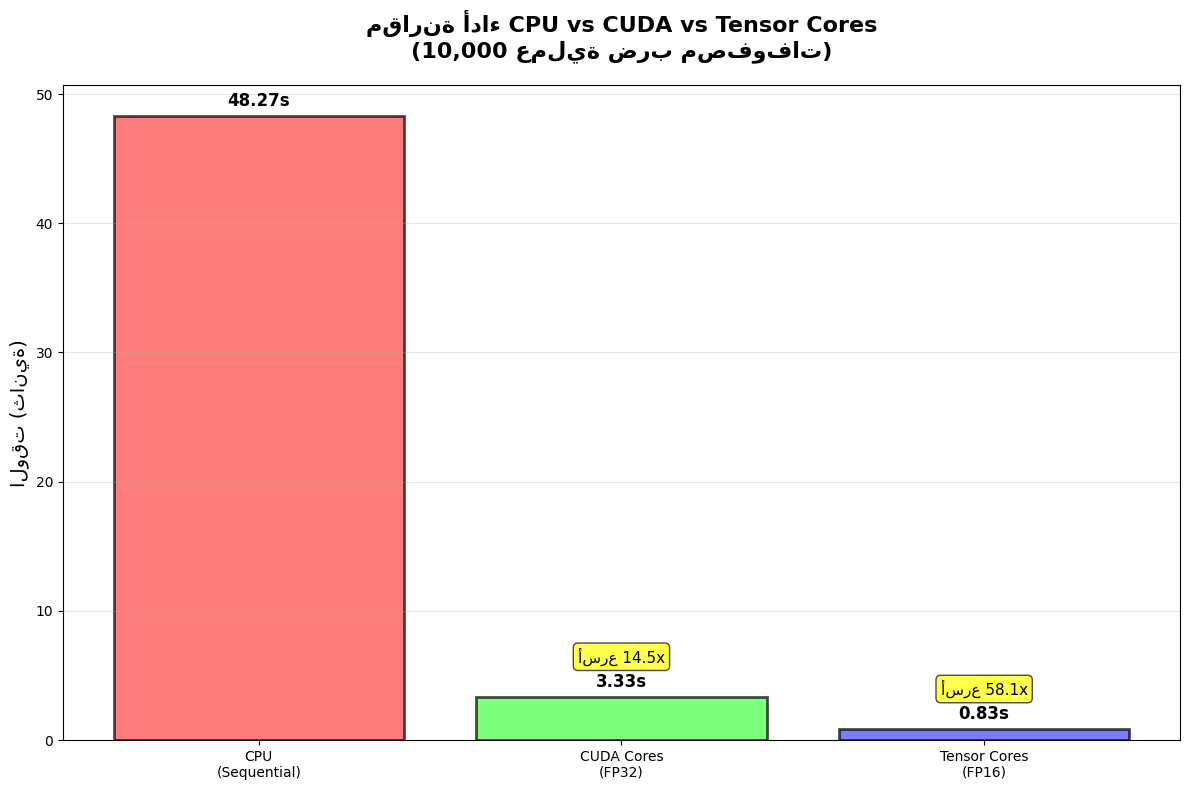


📊 تلخيص النتائج النهائية
🥉 CPU
(Sequential): 48.27 ثانية (المرجع)
🏆 CUDA Cores
(FP32): 3.33 ثانية (أسرع 14.5x)
🏆 Tensor Cores
(FP16): 0.83 ثانية (أسرع 58.1x)


In [7]:
# 📈 إنشاء رسم بياني للمقارنة
import matplotlib.pyplot as plt
import numpy as np

# البيانات
methods = ['CPU\n(Sequential)', 'CUDA Cores\n(FP32)', 'Tensor Cores\n(FP16)']
times = [cpu_time, cuda_time if 'cuda_time' in locals() else 0, 
         tensor_time if 'tensor_time' in locals() else 0]

# تصفية البيانات المتاحة فقط
valid_data = [(method, time) for method, time in zip(methods, times) if time > 0 and time != float('inf')]

if len(valid_data) >= 2:
    methods_valid, times_valid = zip(*valid_data)
    
    # إنشاء الرسم البياني
    plt.figure(figsize=(12, 8))
    
    # رسم أعمدة مع ألوان متدرجة
    colors = ['#ff4444', '#44ff44', '#4444ff'][:len(methods_valid)]
    bars = plt.bar(methods_valid, times_valid, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
    
    # إضافة قيم على الأعمدة
    for bar, time in zip(bars, times_valid):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + max(times_valid)*0.01,
                f'{time:.2f}s', ha='center', va='bottom', fontsize=12, fontweight='bold')
    
    plt.ylabel('الوقت (ثانية)', fontsize=14)
    plt.title('مقارنة أداء CPU vs CUDA vs Tensor Cores\n(10,000 عملية ضرب مصفوفات)', 
              fontsize=16, fontweight='bold', pad=20)
    plt.grid(axis='y', alpha=0.3)
    
    # حساب وإظهار التسريع
    if len(times_valid) >= 2:
        base_time = times_valid[0]  # CPU كقاعدة
        for i, (method, time) in enumerate(zip(methods_valid[1:], times_valid[1:]), 1):
            speedup = base_time / time
            plt.text(i, time + max(times_valid)*0.05, f'أسرع {speedup:.1f}x', 
                    ha='center', va='bottom', fontsize=11, 
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    plt.tight_layout()
    plt.show()

# طباعة تلخيص نصي
print("\n" + "="*60)
print("📊 تلخيص النتائج النهائية")
print("="*60)

for i, (method, time) in enumerate(valid_data):
    if i == 0:
        print(f"🥉 {method}: {time:.2f} ثانية (المرجع)")
    else:
        speedup = valid_data[0][1] / time
        print(f"🏆 {method}: {time:.2f} ثانية (أسرع {speedup:.1f}x)")

print("="*60)

<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 🔬 الفهم العميق: إزاي Tensor Cores بتشتغل؟

### 🧩 مفهوم الـ Tiling (التقسيم لبلاطات)

**المصفوفة اللي بنضربها**:
```
A = [256 × 1024]
B = [1024 × 2048]  
C = A × B = [256 × 2048]
```

**لكن** Tensor Core مبتعاملش مع المصفوفة كاملة! 

**بتقسمها لـ Tiles صغيرة**:
- **Ampere (A100)**: 16×16 أو 8×8
- **Volta/Turing**: 16×16

</div>

In [8]:
# 🧮 حساب عدد Tiles المطلوبة
print("🧩 تحليل عملية Tiling في Tensor Cores")
print("="*50)

# أبعاد المصفوفة
A_rows, A_cols = MATRIX_ROWS, INPUT_FEATURES      # 256 × 1024
B_rows, B_cols = INPUT_FEATURES, OUTPUT_FEATURES  # 1024 × 2048

# حجم Tile (نفترض 16×16 للـ Ampere)
TILE_SIZE = 16

print(f"📏 أبعاد المصفوفات:")
print(f"   A: {A_rows} × {A_cols}")
print(f"   B: {B_rows} × {B_cols}")
print(f"   C: {A_rows} × {B_cols}")

# حساب عدد Tiles لكل بُعد
tiles_A_height = np.ceil(A_rows / TILE_SIZE).astype(int)
tiles_B_width = np.ceil(B_cols / TILE_SIZE).astype(int)  
tiles_inner_dim = np.ceil(A_cols / TILE_SIZE).astype(int)

print(f"\n🧩 تقسيم Tiles (حجم {TILE_SIZE}×{TILE_SIZE}):")
print(f"   عدد tiles في ارتفاع A: {tiles_A_height}")
print(f"   عدد tiles في عرض B: {tiles_B_width}")
print(f"   عدد tiles في البُعد المشترك: {tiles_inner_dim}")

# إجمالي العمليات
total_tile_operations = tiles_A_height * tiles_B_width * tiles_inner_dim

print(f"\n💥 إجمالي عمليات Tile:")
print(f"   {tiles_A_height} × {tiles_B_width} × {tiles_inner_dim} = {total_tile_operations:,}")

print(f"\n⚡ مقارنة العمليات:")
# العمليات في CUDA Cores (element-wise)
cuda_operations = A_rows * A_cols * B_cols
print(f"   CUDA Cores: {cuda_operations:,} عملية ضرب منفردة")
print(f"   Tensor Cores: {total_tile_operations:,} عملية tile")
print(f"   نسبة التقليل: {cuda_operations/total_tile_operations:.1f}x")

print(f"\n🔍 كل Tile Operation تحتوي على:")
print(f"   {TILE_SIZE}×{TILE_SIZE}×{TILE_SIZE} = {TILE_SIZE**3:,} عملية ضرب فردية")
print(f"   لكن تتم في hardware واحد مُدمج!")

🧩 تحليل عملية Tiling في Tensor Cores
📏 أبعاد المصفوفات:
   A: 256 × 1024
   B: 1024 × 2048
   C: 256 × 2048

🧩 تقسيم Tiles (حجم 16×16):
   عدد tiles في ارتفاع A: 16
   عدد tiles في عرض B: 128
   عدد tiles في البُعد المشترك: 64

💥 إجمالي عمليات Tile:
   16 × 128 × 64 = 131,072

⚡ مقارنة العمليات:
   CUDA Cores: 536,870,912 عملية ضرب منفردة
   Tensor Cores: 131,072 عملية tile
   نسبة التقليل: 4096.0x

🔍 كل Tile Operation تحتوي على:
   16×16×16 = 4,096 عملية ضرب فردية
   لكن تتم في hardware واحد مُدمج!


<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

### ⚙️ متطلبات Tensor Cores

**Tensor Cores مش سحر** - عندها شروط معينة:

#### 1️⃣ **نوع البيانات (Data Type)**

| نوع البيانات | الدعم | الاستخدام |
|-------------|-------|----------|
| **FP32** | ❌ | CUDA Cores فقط |
| **FP16** | ✅ | Training & Inference |
| **BF16** | ✅ | Training (أحدث) |
| **TF32** | ✅ | Training (Ampere+) |
| **INT8** | ✅ | Inference فقط |
| **FP8** | ✅ | Hopper+ فقط |

وطبعاً كل ما كان حجم كسور اقل في الرقم كل ما كان السرع في العمليات زي ما واضح في استخدام matrix ب data types متخلفه في السرعه 

<center><img src=https://images.nvidia.com/aem-dam/Solutions/Data-Center/tesla-t4/Turing-Tensor-Core_30fps_FINAL_736x414.gif width=500></center>

ودا جدول بيوضح انواع ال Data Types ال بتدعمها كل نوع 

<div dir="ltr">

|- |A100 | Turing	| Volta |
|-------------|-------|-------|----------|
|Supported Tensor Core Precisions	| FP64, TF32, BFLOAT16, FP16, INT8, INT4, INT1	| FP16, INT8, INT4, INT1	| FP16 |
|Supported CUDA® Core Precisions	    | FP64, FP32, FP16, Bfloat16, INT8	FP64, FP32, | FP16, INT8	            | FP64, FP32, FP16, INT8 |

</dev>

<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

#### 2️⃣ **حجم المصفوفة**

**لازم يكون قابل للقسمة على حجم Tile**:
- لو عندك matrix 17×17 → padding لـ 32×32
- ده بيضيع ذاكرة وحسابات

#### 3️⃣ **نوع العملية**

**يشتغل مع**:
- ✅ `torch.nn.Linear`
- ✅ `torch.matmul`
- ✅ `torch.bmm` (batch matrix multiply)
- ✅ Convolution (بشروط)

**مبيشتغلش مع**:
- ❌ Element-wise operations (+, -, ReLU)
- ❌ Pooling layers
- ❌ Normalization layers

</div>

<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 💡 النصائح العملية والتطبيق الصحيح

### 🎯 إمتى تستخدم إيه؟

#### 💻 **CPU**: الاختيار الأول لـ
- 🔧 العمليات المتسلسلة والمنطق المعقد
- 📊 المعالجة المبدئية للبيانات
- 🗃️ قراءة/كتابة الملفات والقواعد
- 🧮 العمليات الرياضية البسيطة

#### ⚡ **CUDA Cores**: الاختيار الأمثل لـ
- 🎮 العمليات المتوازية العامة
- 🖼️ معالجة الصور والفيديوهات  
- 🧬 المحاكاة العلمية
- 🔄 العمليات العنصرية (element-wise)

#### 🧠 **Tensor Cores**: القوة الخارقة لـ
- 🤖 تدريب نماذج الذكاء الاصطناعي
- 📈 Deep Learning و Neural Networks
- 🔢 ضرب المصفوفات الضخمة
- ⚡ Inference للنماذج الكبيرة

</div>

In [9]:
# 🛠️ كود عملي: إزاي تتأكد إن Tensor Cores شغالة
print("🔍 إزاي تتأكد إن Tensor Cores بتشتغل فعلاً؟")
print("="*60)

if torch.cuda.is_available():
    # 1. التأكد من دعم Tensor Cores
    device_props = torch.cuda.get_device_properties(0)
    print(f"📱 GPU: {device_props.name}")
    print(f"🔢 Compute Capability: {device_props.major}.{device_props.minor}")
    
    # Tensor Cores متاحة من Compute Capability 7.0+
    if device_props.major >= 7:
        print("✅ Tensor Cores مدعومة!")
    else:
        print("❌ Tensor Cores غير مدعومة (تحتاج Volta+ architecture)")
    
    print(f"\n💾 VRAM: {device_props.total_memory / 1e9:.1f} GB")
    
    # 2. نصائح للاستخدام الأمثل
    print(f"\n💡 نصائح للاستخدام الأمثل:")
    print(f"   🎯 استخدم FP16 أو BF16 للتدريب")
    print(f"   📏 اجعل أبعاد المصفوفات قابلة للقسمة على 8 أو 16")
    print(f"   🔄 استخدم batch sizes كبيرة قدر الإمكان")
    print(f"   ⚡ استخدم torch.autocast() للـ mixed precision")
    
    # 3. مثال على استخدام mixed precision
    print(f"\n📝 مثال كود محسن:")
    print("""
# ❌ طريقة عادية (CUDA Cores)
model = nn.Linear(1024, 2048).cuda()
x = torch.randn(256, 1024).cuda()
output = model(x)

# ✅ طريقة محسنة (Tensor Cores)  
model = nn.Linear(1024, 2048).cuda().half()
x = torch.randn(256, 1024).cuda().half()
with torch.autocast(device_type='cuda'):
    output = model(x)
""")

else:
    print("❌ CUDA غير متاح على هذا النظام")

🔍 إزاي تتأكد إن Tensor Cores بتشتغل فعلاً؟
📱 GPU: NVIDIA GeForce RTX 3050 Laptop GPU
🔢 Compute Capability: 8.6
✅ Tensor Cores مدعومة!

💾 VRAM: 4.3 GB

💡 نصائح للاستخدام الأمثل:
   🎯 استخدم FP16 أو BF16 للتدريب
   📏 اجعل أبعاد المصفوفات قابلة للقسمة على 8 أو 16
   🔄 استخدم batch sizes كبيرة قدر الإمكان
   ⚡ استخدم torch.autocast() للـ mixed precision

📝 مثال كود محسن:

# ❌ طريقة عادية (CUDA Cores)
model = nn.Linear(1024, 2048).cuda()
x = torch.randn(256, 1024).cuda()
output = model(x)

# ✅ طريقة محسنة (Tensor Cores)  
model = nn.Linear(1024, 2048).cuda().half()
x = torch.randn(256, 1024).cuda().half()
with torch.autocast(device_type='cuda'):
    output = model(x)



<div dir="rtl" style="font-family: 'Segoe UI', Tahoma, Arial, sans-serif; line-height: 1.8;">

## 🎓 الخلاصة النهائية

### 📊 المقارنة الشاملة

| المعيار | CPU | CUDA Cores | Tensor Cores |
|---------|-----|------------|-------------|
| 🎯 **الاستخدام الأمثل** | عمليات متسلسلة | توازي عام | ضرب مصفوفات |
| ⚡ **السرعة** | 1x (مرجع) | 5-15x | 20-100x |
| 🧠 **المرونة** | عالية جداً | عالية | محدودة |
| 💾 **استهلاك الطاقة** | متوسط | عالي | عالي (لكن كفوء) |
| 💰 **التكلفة** | منخفضة | متوسطة-عالية | عالية |
| 📚 **سهولة البرمجة** | سهل | متوسط | سهل (مع PyTorch) |

### 🚀 التوصيات العملية

#### للمبتدئين في الـ AI:
1. **ابدأ بـ CPU** لفهم الأساسيات
2. **انتقل لـ CUDA** لما تحتاج تسريع
3. **استخدم Tensor Cores** للمشاريع الجدية

#### للمحترفين:
1. **استخدم Mixed Precision** دايماً مع PyTorch
2. **اضبط batch sizes** بناءً على VRAM المتاح
3. **راقب GPU utilization** بـ `nvidia-smi`

#### للشركات:
1. **A100/H100** للتدريب المكثف
2. **RTX 4090** لـ inference والتطوير
3. **RTX 3060/4060** للمشاريع الصغيرة

### 🔮 المستقبل

- **FP8**: دقة أقل، سرعة أعلى (H100+)
- **Sparsity**: استغلال المصفوفات المتناثرة
- **Multi-GPU**: توزيع أذكى للحسابات

---

**📧 الملخص في جملة واحدة**: 
*CPU للمنطق، CUDA للتوازي، Tensor Cores للذكاء الاصطناعي* 🚀

</div>

### 🔗 مراجع وروابط إضافية

* بحث Google: [CUDA vs Tensor Cores](https://www.google.com/search?q=CUDA+vs+Tensor+Cores)
* NVIDIA Volta Architecture – en.wikipedia.org:
  ![Volta Tensor Core](https://upload.wikimedia.org/wikipedia/commons/thumb/4/4b/TensorCore-operation.svg/800px-TensorCore-operation.svg.png)
* CUDA – en.wikipedia.org/wiki/CUDA
* Tensor Core – en.wikipedia.org/wiki/Tensor\_Core
* Architecture Guide – [researchgate.com](https://www.researchgate.com/publication/334567123_NVIDIA_Volta_Architecture)

### BY: OSAMA M0

[![Typing SVG](https://readme-typing-svg.demolab.com/?lines=Thanks+for+reading)](https://git.io/typing-svg)